<a href="https://colab.research.google.com/github/shanxar/SCIKIT/blob/main/sk_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import kagglehub

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [22]:
import os

path=os.path.join(path,os.listdir(path)[0])
print(path)

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

#STEP 1: LOAD DATA
df=pd.read_csv(path)

print(df.columns)

filtered_columns=["income","score"]
df.rename(columns={"Annual Income (k$)":filtered_columns[0],"Spending Score (1-100)":filtered_columns[1]},inplace=True) #rename for convennience

assert all(col in df.columns for col in filtered_columns), "Not renamed properly"

#for now ,starters using two features for eassy visualization
new_df=df[filtered_columns]
print(new_df)



Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
     income  score
0        15     39
1        15     81
2        16      6
3        16     77
4        17     40
..      ...    ...
195     120     79
196     126     28
197     126     74
198     137     18
199     137     83

[200 rows x 2 columns]


In [24]:
#STEP 2 : NORMALIZE

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(new_df)

print(scaled_df)


[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [25]:
#STEP 3 : CLUSTERING

from sklearn.cluster import KMeans

kmeans_obj=KMeans(n_clusters=5,random_state=22) #manually chose n=5

kmeans_obj.fit(scaled_df)

#ASSIGN THE CALCULATED CLUSTER TO EACH ROWS
new_df['Cluster']=kmeans_obj.labels_
print(new_df['Cluster'])

0      2
1      0
2      2
3      0
4      2
      ..
195    4
196    3
197    4
198    3
199    4
Name: Cluster, Length: 200, dtype: int32


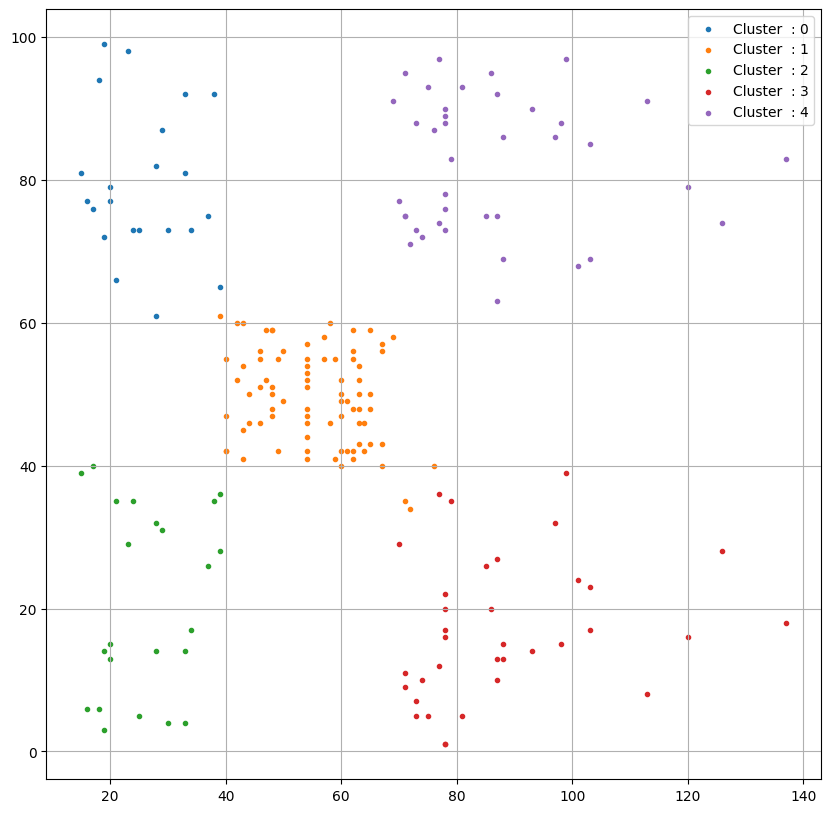

In [26]:
#STEP4 : VISUALIZE

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))


for i in range(5):
  cluster_data=new_df[new_df['Cluster']==i]
  plt.scatter(cluster_data['income'],cluster_data['score'],label= f"Cluster  : {i}",marker=".")

plt.legend()
plt.grid(True)
plt.show()

In [27]:
#STEP 5: GROUP BY

group_by=new_df.groupby('Cluster')[["income","score"]].mean()

print(group_by)

            income      score
Cluster                      
0        25.727273  79.363636
1        55.296296  49.518519
2        26.304348  20.913043
3        88.200000  17.114286
4        86.538462  82.128205


STEP 6 : INFERENCING

From our result we infer the following



1.Cluster 0 - Low income but high spending


2.Cluster 1 - Average income and average spending


3.Cluster 2 - Low income and low spending


4.Cluster 3 - High income but low spending


5.Cluster 4 - High income and high spending




**Business insight:**

Cluster 4 is highly valuable


Cluster 3 is potent high spending group, need some marketing to attract them


Cluster 1 are consistent


